<a href="https://colab.research.google.com/github/Chelovek2002/BA_Project_Team_E/blob/main/Project_Team_E_'Easy'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Мы - банк, который доставляет карточки потребителям внутри одного города. Город поделён на кварталы.

Каждый день в квартале может возникнуть заказ на доставку.

Банк в начале недели выбирает покупает n смен работы курьеров (каждая смена длится до 12 часов). Задача курьера - доставить карточки как максимальному числу клиентов.

Банк платит курьерам n рублей за каждый проеханый километр

In [ ]:
!pip install h3
!pip install h3pandas
!pip install boto3
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 2.2 MB/s 
     |████████████████████████████████| 1.0 MB 9.4 MB/s 
     |████████████████████████████████| 6.3 MB 31.0 MB/s 
     |████████████████████████████████| 16.7 MB 601 kB/s 
  Created wheel for h3pandas: filename=h3pandas-0.2.3-py3-none-any.whl size=17136 sha256=36057e770a525f7beef6361275387ed7b436433e8134f1058834a08127bfd34a
  Stored in directory: /root/.cache/pip/wheels/59/d8/b5/d5406a801c743e39323e3305611d8caf558077b6caf7e8858f
Successfully built h3pandas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 4.2 MB/s 
     |████████████████████████████████| 79 kB 273 kB/s 
     |█████████

In [ ]:
pip install folium matplotlib mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127 kB 6.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.31.6 requires protobuf<4.0.0dev,>=3.12.0; python_version > "3", but you have protobuf 4.21.9 which is incompatible.


In [ ]:
import h3
import h3pandas 
import boto3
import pandas as pd
import geopandas as gpd
import numpy as np

# Получаем данные 
У нас будет использоваться 2 датасета, первый - гексагоны, куда попадают заявки на продукты с вероятностью попадания заявки. Второй - матрица расстояний между гексагонами 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_request = pd.read_csv('/content/drive/MyDrive/requests_df.csv')
dist_matrix = pd.read_csv('/content/drive/MyDrive/dist_matr.csv').set_index('index')

In [ ]:
df_request.head(5)

,hex,probs
0,882175aa1bfffff,0.172043
1,882175aacdfffff,0.069892
2,882175aa13fffff,0.069892
3,882175a167fffff,0.057348
4,882175a123fffff,0.051971


In [ ]:
dist_matrix.head(5)

,882175aa1bfffff,882175aacdfffff,882175aa13fffff,882175a167fffff,882175a123fffff,882175aa17fffff,882175aa11fffff,882175a12dfffff,882175a135fffff,882175aac5fffff,...,882175b829fffff,882175b6adfffff,882175a647fffff,882175a23dfffff,8821751817fffff,8821751413fffff,8821753159fffff,8821751a1dfffff,882175aa81fffff,882175a815fffff
index,,,,,,,,,,,,,,,,,,,,,
882175aa1bfffff,0.0,743.0,779.0,5712.0,2988.0,1751.0,1124.0,4659.0,3250.0,1695.0,...,15492.0,45171.0,31200.0,25323.0,28425.0,20670.0,25671.0,28425.0,5493.0,9520.0
882175aacdfffff,743.0,0.0,887.0,5416.0,2693.0,1928.0,1572.0,4364.0,2955.0,1170.0,...,15953.0,44437.0,30905.0,25027.0,28886.0,20899.0,25184.0,28886.0,4874.0,9032.0
882175aa13fffff,779.0,887.0,0.0,6249.0,3525.0,1441.0,1137.0,5196.0,3787.0,1396.0,...,16076.0,45324.0,31737.0,25860.0,29009.0,20391.0,24951.0,29009.0,5236.0,8800.0
882175a167fffff,5712.0,5416.0,6249.0,0.0,3553.0,7200.0,6836.0,1243.0,4282.0,6586.0,...,20528.0,45477.0,31948.0,26071.0,30315.0,26141.0,30600.0,30315.0,10290.0,14448.0
882175a123fffff,2988.0,2693.0,3525.0,3553.0,0.0,4476.0,4112.0,2655.0,1474.0,3863.0,...,17811.0,43422.0,29893.0,24016.0,28260.0,23396.0,27877.0,28260.0,7567.0,11725.0


Давайте посмотрим на наши заявки

In [ ]:
df_request.set_index('hex').h3.h3_to_geo_boundary().explore('probs', popup=True)

In [222]:
import random
time_windows = [[0, 2], [2,4], [4,6], [6,8], [8, 10], [10,12]]
probs = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]
depot_time = [[0,0]]
depot = df_request.iloc[df_request.probs.idxmax(),0]


def get_meet_sample(req_df, n):
    global probs, time_windows, depot, depot_time
    meet_df = pd.DataFrame()
    hex_sample = np.random.choice(req_df.hex, size=n, p = req_df.probs)
    meet_df['hex'] = np.append(depot, hex_sample)
    meet_df['times'] = depot_time + random.choices(time_windows, weights = probs, k=n)
    return meet_df


In [244]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model(nv):
    """Stores the data for the problem."""
    global df_request

    sample = get_meet_sample(df_request, int(np.random.triangular(10, 30, 50)))
    sample_dist_matrix = dist_matrix.loc[sample['hex'], sample['hex']] # meters

     # in minutes, assuming speed is 60 km/h
    time_matrix = (sample_dist_matrix/(1000)).to_numpy() + 15
    time_windows = [[int(t*60) for t in tw] for tw in sample['times'].to_numpy()]

    data = {
        'time_matrix': time_matrix,
        'time_windows': time_windows,
        'num_vehicles': nv,
        'depot': 0
        }

    return data

In [245]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    time_dimension = routing.GetDimensionOrDie('Time')
    total_time = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)

        while not routing.IsEnd(index):
            time_var = time_dimension.CumulVar(index)
            plan_output += '{0} Time({1},{2}) -> '.format(
                manager.IndexToNode(index), solution.Min(time_var),
                solution.Max(time_var))
            index = solution.Value(routing.NextVar(index))
            
        time_var = time_dimension.CumulVar(index)
        plan_output += '{0} Time({1},{2})\n'.format(manager.IndexToNode(index),
                                                    solution.Min(time_var),
                                                    solution.Max(time_var))
        plan_output += 'Time of the route: {}h\n'.format(
            solution.Min(time_var)/60)
        print(plan_output)
        total_time += solution.Min(time_var)

    print('Total time of all routes: {}h'.format(total_time/60))


In [258]:
def main(nv):
    """Solve the VRP with time windows."""
    # Instantiate the data problem.
    data = create_data_model(nv=nv)

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def time_callback(from_index, to_index):
        """Returns the travel time between the two nodes."""
        # Convert from routing variable Index to time matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['time_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(time_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Time Windows constraint.
    time = 'Time'
    routing.AddDimension(
        transit_callback_index,
        60,  # allow waiting time
        12*60,  # maximum time per vehicle
        False,  # Don't force start cumul to zero.
        time)
    time_dimension = routing.GetDimensionOrDie(time)
    
    # Allow to drop nodes.
    penalty = 300
    for node in range(1, len(data['time_matrix'])):
        routing.AddDisjunction([manager.NodeToIndex(node)], penalty)

    # Add time window constraints for each location except depot.
    for location_idx, time_window in enumerate(data['time_windows']):
        if location_idx == data['depot']:
            continue
        index = manager.NodeToIndex(location_idx)
        time_dimension.CumulVar(index).SetRange(time_window[0], time_window[1])

    # Add time window constraints for each vehicle start node.
    depot_idx = data['depot']
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        time_dimension.CumulVar(index).SetRange(
            data['time_windows'][depot_idx][0],
            data['time_windows'][depot_idx][1])

    # Instantiate route start and end times to produce feasible times.
    for i in range(data['num_vehicles']):
        routing.AddVariableMinimizedByFinalizer(
            time_dimension.CumulVar(routing.Start(i)))
        routing.AddVariableMinimizedByFinalizer(
            time_dimension.CumulVar(routing.End(i)))

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)
    # Print solution on console.
    # if solution:
    #     print_solution(data, manager, routing, solution)
    return [solution.ObjectiveValue()/60, len(data['time_matrix'])]

In [261]:
XY = np.array([main(8) for i in range(1000)])

0.0


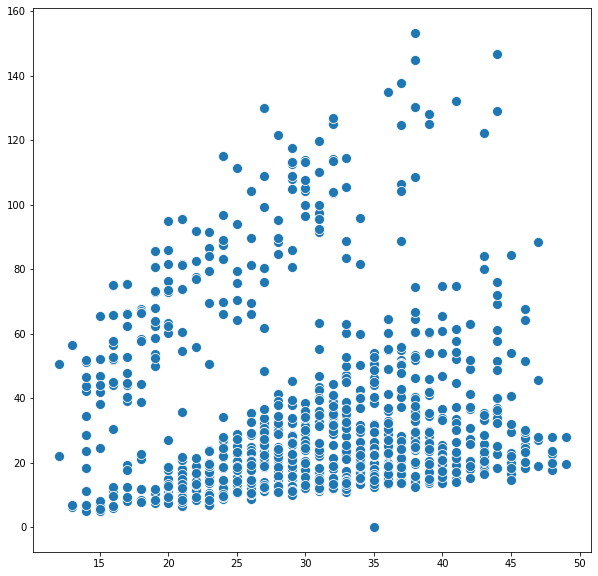

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x=XY[:,1],y=XY[:,0], s=100)
print(np.min(XY[:,0]))